# 小象学院实践课
## 机器学习
## IBM员工流失预测

保持员工满意的问题是一个长期存在且历史悠久的挑战。如果您投入了大量时间和金钱的员工离开，那么这意味着您将不得不花费更多的时间和金钱来雇佣其他人。这个项目使用了IBM的员工流失数据作为处理目标，看看我们是否可以构建一些模型，来对员工的流失进行预测。

> **提示**：这样的文字将会指导你如何使用 jupyter Notebook 来完成项目。你可以通过单击代码区域，然后使用键盘快捷键 Shift+Enter 或 Shift+Return 来运行代码。或者在选择代码后使用执行（run cell）按钮执行代码。Markdown的文字区域也同样可以如此操作。

> 在如下有**# TODO** 提示的地方，将代码补全，实现注释中所要求的功能。

> 在有"** 回答：**" 提示的地方，回答其上所提出的问题。


## 这个工程的结构如下：
- 探索性数据分析：在本节中，我们通过查看特征分布，一个特征与另一个特征的相关性以及创建一些可视化图表来探索数据集。
- 特征工程：执行一些简单的特征处理工作。
- 实现机器学习模型：尝试多种机器学习模型，从这些模型中查看参数对结果的影响。


----
## 探索数据
运行下面的代码


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler ,LabelEncoder 
import warnings
warnings.filterwarnings('ignore')

#文件读取
attrition = pd.read_csv('./data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
attrition.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

## 观察
从员工流失数据样本中，我们可以看到数据的一些特征：
    * Age：员工年龄
    * Attrition：员工是否已经离职，1表示已经离职，2表示未离职，这是目标预测值；
    * BusinessTravel：商务差旅频率，Non-Travel表示不出差，Travel_Rarely表示不经常出差，Travel_Frequently表示经常出差；
    * Department：员工所在部门，Sales表示销售部，Research & Development表示研发部，Human Resources表示人力资源部；
    * DistanceFromHome：公司跟家庭住址的距离，从1到29，1表示最近，29表示最远；
    * Education：员工的教育程度，从1到5，5表示教育程度最高；
    * EducationField：员工所学习的专业领域，Life Sciences表示生命科学，Medical表示医疗，Marketing表示市场营销，Technical Degree表示技术学位，Human Resources表示人力资源，Other表示其他；
    * EmployeeNumber：员工号码；
    * EnvironmentSatisfaction：员工对于工作环境的满意程度，从1到4，1的满意程度最低，4的满意程度最高；
    * Gender：员工性别，Male表示男性，Female表示女性；
    * JobInvolvement：员工工作投入度，从1到4，1为投入度最低，4为投入度最高；
    * JobLevel：职业级别，从1到5，1为最低级别，5为最高级别；
    * JobRole：工作角色：Sales Executive是销售主管，Research Scientist是科学研究员，Laboratory Technician实验室技术员，Manufacturing Director是制造总监，Healthcare Representative是医疗代表，Manager是经理，Sales Representative是销售代表，Research Director是研究总监，Human Resources是人力资源；
    * JobSatisfaction：工作满意度，从1到4，1代表满意程度最低，4代表满意程度最高；
    * MaritalStatus：员工婚姻状况，Single代表单身，Married代表已婚，Divorced代表离婚；
    * MonthlyIncome：员工月收入，范围在1009到19999之间；
    * NumCompaniesWorked：员工曾经工作过的公司数；
    * Over18：年龄是否超过18岁；
    * OverTime：是否加班，Yes表示加班，No表示不加班；
    * PercentSalaryHike：工资提高的百分比；
    * PerformanceRating：绩效评估；
    * RelationshipSatisfaction：关系满意度，从1到4，1表示满意度最低，4表示满意度最高；
    * StandardHours：标准工时；
    * StockOptionLevel：股票期权水平；
    * TotalWorkingYears：总工龄；
    * TrainingTimesLastYear：上一年的培训时长，从0到6，0表示没有培训，6表示培训时间最长；
    * WorkLifeBalance：工作与生活平衡程度，从1到4，1表示平衡程度最低，4表示平衡程度最高；
    * YearsAtCompany：在目前公司工作年数；
    * YearsInCurrentRole：在目前工作职责的工作年数
    * YearsSinceLastPromotion：距离上次升职时长
    * YearsWithCurrManager：跟目前的管理者共事年数；

在我们即将构建的机器学习模型当中，'Attrition'将是模型训练的目标列。

此外，我们看到我们混合了数字和分类数据类型。 对于分类数据类型（非数字列），我们将在以后的练习中再尝试新的处理方法。 本节将专注于数字类型的相关属性探索。

作为第一步，让我们快速进行一些简单的数据完整性检查，以查看数据中是否存在空值或无效值。

In [2]:
# TODO
# 查看表中是否有空值
attrition.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

### 问题
数据集中有空值嘛？如果有，应该如何处理呢？
没有
** 回答：**
attrition.dropna()

## 数据集的分布

通常，探索数据的前几个步骤之一就是大致了解这些特征如何分布。

直觉的判断，年龄(Age)、日工作效率（DailyRate）、员工满意度（JobSatisfaction）、月收入（MonthlyIncome）、工作表现（PerformanceRating）、工作生活平衡性（WorkLifeBalance）、进入公司年限（YearsAtCompany）这些属性与我们所关注的员工是否离职应有莫大的关系。

为此，我将从Seaborn绘图库调用** pairplot **函数，将这些属性之间的关系用可视化的方式表示出来：（如果您没有安装seaborn，可以调用conda install seaborn进行安装）。

### 挑战小提示
以下**TODO** 所需补充的代码逻辑，使用lambda和apply函数来完成可以让代码更为简洁和高效。


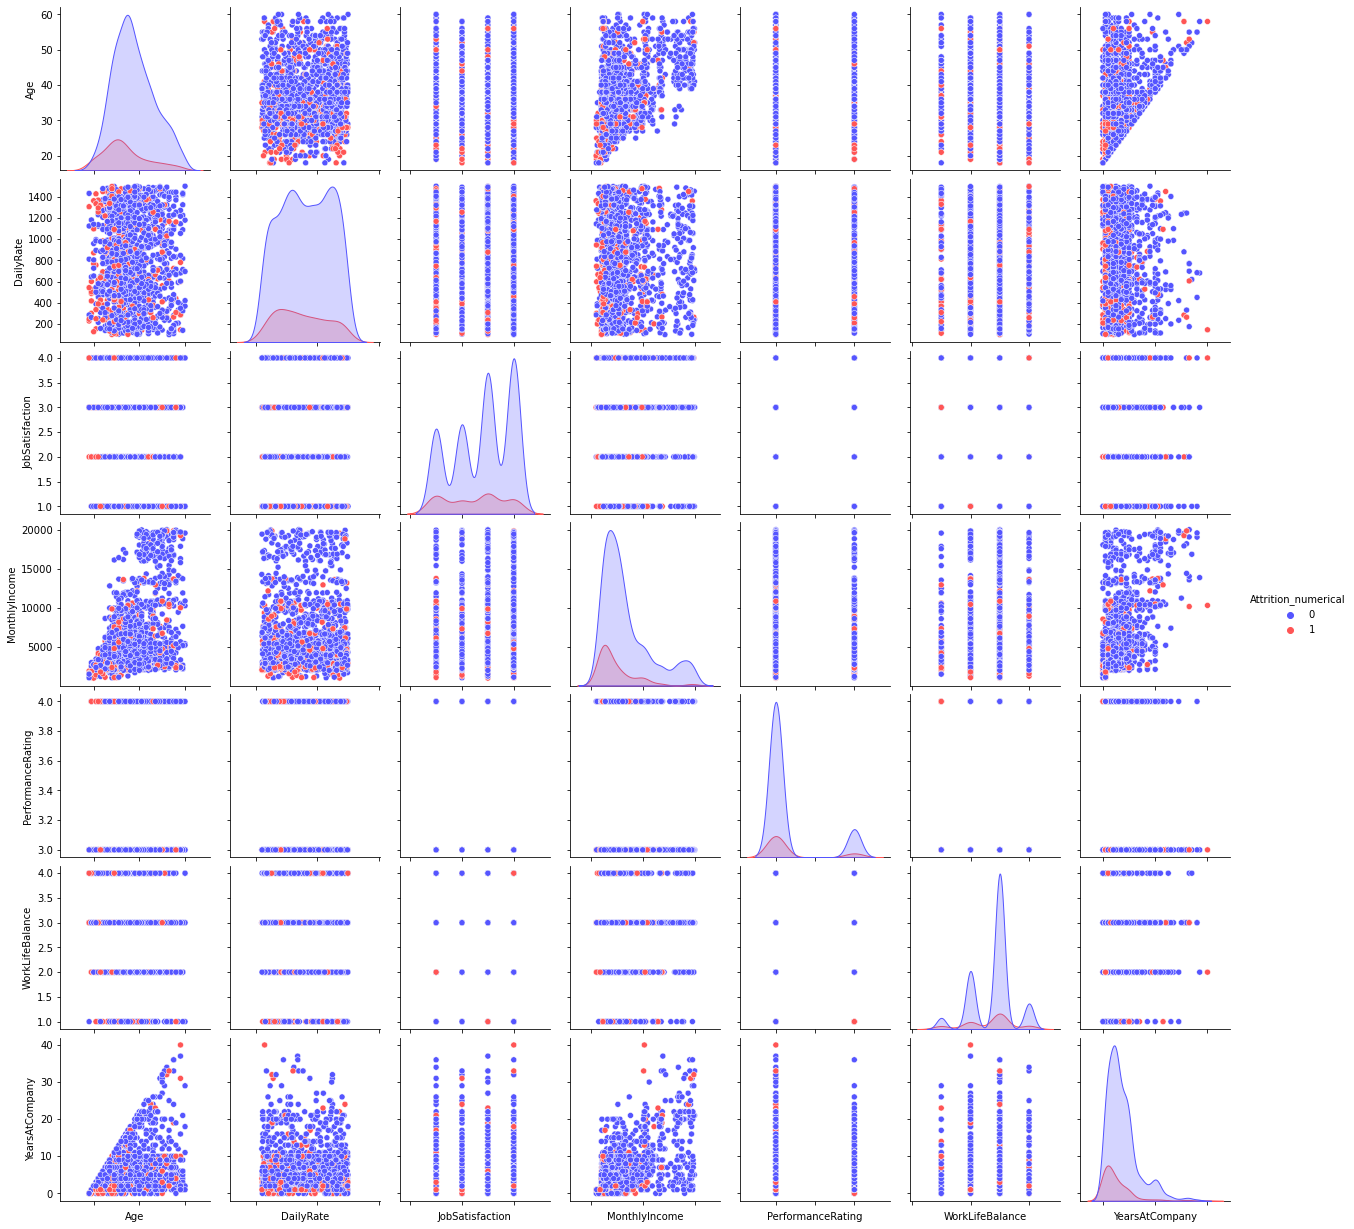

In [5]:
import seaborn as sns
# TODO
# 将dataframe类型变量attrition中的Attrition列转化为Int类型，并放入一个新建的属性Attrition_numerical中。
# Attrition列中的元素与Attrition_numerical元素的值对应关系是：'Yes'=>1，'No'=>0
attrition['Attrition_numerical'] = attrition['Attrition'].apply(lambda x:1 if x=='Yes' else 0)
# 定义要绘制两两关系的属性列
numerical = [u'Age', u'DailyRate',  u'JobSatisfaction',
       u'MonthlyIncome', u'PerformanceRating',
        u'WorkLifeBalance', u'YearsAtCompany', u'Attrition_numerical']

# 绘制关系图
g = sns.pairplot(attrition[numerical], hue='Attrition_numerical', palette='seismic', diag_kind = 'kde',diag_kws=dict(shade=True))
g.set(xticklabels=[])


---
### 观察
在上图中，红色的点代表离职，蓝色代表未离职。

我们可以看到一些有意思的结果，比如在MonthlyIncome与YearsAtCompany交汇的这张图中，红色点更趋向集中于左下角，这很明显地说明了MonthlyIncome与YearsAtCompany都相对较低时，员工容易出现离职的情况。

再比如在YearsAtCompany这行对应的DailyRate这张图中，DailyRate的变化似乎对员工是否离职没有太多的影响。红色点集中于图像下部，YearsAtCompany小的员工相对更容易出现离职情况而与DailyRate没什么关系。

### 探索
这些关系具体如何更好的量化呢？让我们一起来探索一下吧！
- 首先我们要将员工的流失情况记录下来，并将其从原表中删除

In [6]:
# TODO
# 使用变量y记录attrition中'Attrition_numerical'这一列的值
y = attrition['Attrition_numerical']

# TODO
# 将attrition中的'Attrition'以及'Attrition_numerical'列删除
attrition.drop(columns=['Attrition', 'Attrition_numerical'], inplace=True)

attrition.head()

Age     BusinessTravel  DailyRate              Department  \
0   41      Travel_Rarely       1102                   Sales   
1   49  Travel_Frequently        279  Research & Development   
2   37      Travel_Rarely       1373  Research & Development   
3   33  Travel_Frequently       1392  Research & Development   
4   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  ... RelationshipSatisfaction  StandardHours  \
0                        2  ...                        1             80   
1                        3  ...                        4             80   
2                        4  ...                        2             80   
3                        4  ...                        3             80   
4                        1  ...                        4             80   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                  8                     0                1   
1                 1                 10                     3                3   
2                 0                  7                     3                3   
3                 0                  8                     3                3   
4                 1                  6                     3                3   

  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                   4                        0   
1             10                   7                        1   
2              0                   0                        0   
3              8                   7                        3   
4              2                   2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 34 columns]

### 属性类型判别
在数据当中有很多列的都是由字符串组成的，在对数据集进行了简要的探索之后，现在让我们继续进行特征工程的任务，并对我们的数据集中的某些非数值属性进行数字编码。  

首先，我们将通过使用dtype方法将数值列与非数值列分开，如下所示：

In [11]:
from pandas.api.types import is_numeric_dtype
# categoricals列表将用于记录所有的非数值属性名
categoricals = []

# TODO
# 将非数值列的列名添加到列表categoricals中，并且将这些非数值列的列名都打印出来   
for column in attrition.columns.values:
    if not is_numeric_dtype(attrition[column]):
        categoricals.append(column)
    
print(categoricals)
    

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


### 问题
为什么要将非数值属性进行数字编码？

** 回答： **
找到类别属性

### 特征处理
之后，我们对非数值属性进行处理，将他们转化为数值的形式。这里我们采用get_dummies方法：

In [14]:
# 使用pandas中的get_dummies方法将非数值列转为数字，并用转化好的列替换掉原本的列

# 提取非数值类型
# TODO
# 将attrition中名字为categoricals中所记录的那些列数据提取出来，放到DataFrame类型的变量attrition_cat中
attrition_cat = attrition[categoricals]

# TODO
# 使用pd.get_dummies将attrition_cat转换成数值形式并将结果覆盖赋值到原有变量attrition_cat之上
attrition_cat = pd.get_dummies(attrition_cat)
# 提取数值类型
# TODO
# 获取attrition的数值类型属性列的所有数据，赋值到DataFrame类型的变量attrition_num上
num_cols = []
for column in attrition.columns.values:
    if is_numeric_dtype(attrition[column]):
        num_cols.append(column)

attrition_num = attrition[num_cols]

# TODO
# 将attrition_num与attrition_cat进行拼接，生成新的DataFrame并赋值到变量attrition_final上
# attrition_final中的列由attrition_num与attrition_cat的列组成
attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)

attrition_final.head()

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  EmployeeNumber  \
0   41       1102                 1          2              1               1   
1   49        279                 8          1              1               2   
2   37       1373                 2          2              1               4   
3   33       1392                 3          4              1               5   
4   27        591                 2          1              1               7   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2          94               3         2  ...   
1                        3          61               2         2  ...   
2                        4          92               2         1  ...   
3                        4          56               3         1  ...   
4                        1          40               3         1  ...   

   JobRole_Research Director  JobRole_Research Scientist  \
0                          0                           0   
1                          0                           1   
2                          0                           0   
3                          0                           1   
4                          0                           0   

   JobRole_Sales Executive  JobRole_Sales Representative  \
0                        1                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   

   MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
0                       0                      0                     1   
1                       0                      1                     0   
2                       0                      0                     1   
3                       0                      1                     0   
4                       0                      1                     0   

   Over18_Y  OverTime_No  OverTime_Yes  
0         1            0             1  
1         1            1             0  
2         1            0             1  
3         1            0             1  
4         1            1             0  

[5 rows x 55 columns]

### 思考题
- 我们可以看到，表格中数值分布较为分散，范围不一，比如DailyRate的值范围是一千多或者几百，HourlyRate的值大都为几时。这会对结果照成什么样的影响？如果我们将所有的数值全部限定在0-1范围内，会对结果又什么样的影响？

**提示：** 参考归一化内容。

** 回答：**
能提高梯度下降法求解最优解的速度

###  模型应用

我们将在 [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) 中选择以下监督学习模型对数据进行训练：
- 高斯朴素贝叶斯 (GaussianNB)
- 决策树 (DecisionTree)
- K近邻 (K Nearest Neighbors)
- 支持向量机 (SVM)
- Logistic回归（LogisticRegression）
---
首先我们需要划分数据集为训练集和测试集

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# TODO
# 使用train_test_split方法，划分训练集和测试集，指定80%数据为训练集，20%为测试集
X_train, X_test, y_train, y_test = train_test_split(attrition_final, y,  test_size=1/5, random_state=0)


### 问题
为什么需要将数据集划分为训练集和测试集?

** 回答： **
训练集用于训练模型
测试集用于校验模型准确率

### SVM
请建立SVM模型并计算准确率

In [26]:
from sklearn.svm import SVC
# 准确率
svm_acc=[]
# TODO
# 构建SVM模型（默认参数即可），并调用fit进行模型拟合
svm_model = SVC()
svm_model.fit(X_train, y_train)
acc = svm_model.score(X_test, y_test)
svm_acc.append(acc)
# TODO
# 计算svm在测试集上的准确率并将准确率结果添加到svm_acc中


# 打印准确率
print('准确率：', svm_acc[0])


准确率： 0.8333333333333334


### 决策树
请根据不同树深度建立决策树模型并计算准确率

In [31]:
from sklearn.tree import DecisionTreeClassifier

# 树深度
depths=[1,3,5,7,9]
# 准确率
dt_acc=[]
# TODO
# 尝试depths中所列举的所有树深度情况，使用决策树模型做多次训练。
# 针对每种树深情况计算一次在测试集上的准确率，打印每次训练所获得的准确率，并将每次准确率结果添入列表dt_acc中。
for depth_val in depths:
    dt_model = DecisionTreeClassifier(max_depth=depth_val)
    dt_model.fit(X_train, y_train)
    dt_acc.append(dt_model.score(X_test, y_test))
    print('depth_val:{},测试集的准确率: {:.3f}'.format(depth_val,dt_model.score(X_test, y_test)))

dt_model = DecisionTreeClassifier(max_depth=5)
dt_model.fit(X_train, y_train)

depth_val:1,测试集的准确率: 0.833
depth_val:3,测试集的准确率: 0.833
depth_val:5,测试集的准确率: 0.847
depth_val:7,测试集的准确率: 0.830
depth_val:9,测试集的准确率: 0.799


DecisionTreeClassifier(max_depth=5)

### 问题
- 从结果看，树的深度是越大，在测试集上的准确率越高么？随着深度增加模型在测试集上的准确率是否出现下降的情况？这一现象说明了什么？

** 回答： **
不是
深度增加模型在测试集上的准确率下降
深度增加导致过拟合

### 朴素贝叶斯
请建立朴素贝叶斯模型并计算准确率

In [22]:
from sklearn.naive_bayes import GaussianNB

# 准确率
gnb_acc=[]

# TODO
# 构建GaussianNB模型（默认参数即可），并调用fit进行模型拟合
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
# TODO
# 计算GaussianNB在测试集上的准确率并将准确率结果添加到gnb_acc中
acc = gnb_model.score(X_test, y_test)
gnb_acc.append(acc)
# 打印准确率
print('准确率：', gnb_acc[0])


准确率： 0.7755102040816326


### KNN
请建立KNN模型并计算准确率

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# K参数选项
neighbors = [1,3,5,7,9]
# 准确率
knn_acc=[]
# TODO
# 尝试neighbors中所列举的所有K选项，使用KNeighborsClassifier模型做多次训练。
# 针对每种K值情况计算一次在测试集上的准确率，打印每次训练所获得的准确率，并将每次准确率结果添入列表knn_acc中。
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    knn_acc.append(acc)
    print('neighbor:{},测试集的准确率: {:.3f}'.format(depth_val,acc))


knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train, y_train)

neighbor:9,测试集的准确率: 0.759
neighbor:9,测试集的准确率: 0.793
neighbor:9,测试集的准确率: 0.799
neighbor:9,测试集的准确率: 0.820
neighbor:9,测试集的准确率: 0.823


KNeighborsClassifier(n_neighbors=9)

### 逻辑回归
请建立逻辑回归模型并计算准确率

In [25]:
from sklearn.linear_model import LogisticRegression

# 准确率
lr_acc=[]
# TODO
# 构建LogisticRegression模型（默认参数即可），并调用fit进行模型拟合
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
acc = lr_model.score(X_test, y_test)
lr_acc.append(acc)
# TODO
# 计算LogisticRegression在测试集上的准确率并将准确率结果添加到lr_acc中


# 打印准确率
print('准确率：', lr_acc[0])

准确率： 0.8333333333333334


### 问题
为什么我们可以使用逻辑回归模型进行分类呢？

** 回答： **
通过对比概率进行分类

## 模型比较

      Accuracy (%)
Model             
svm      83.333333
dt       84.693878
gnb       77.55102
knn      82.312925
lr       83.333333


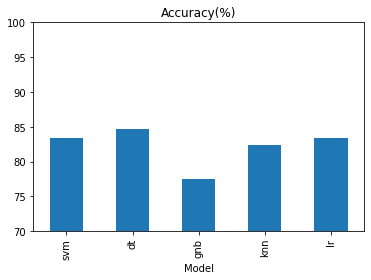

In [37]:
# 将结果以图像展示出来
results_df = pd.DataFrame(columns=['Accuracy (%)'],index=['svm','dt','gnb','knn','lr'])
results_df.index.name = 'Model'
results_df.loc['svm', 'Accuracy (%)'] = max(svm_acc) * 100
results_df.loc['dt', 'Accuracy (%)'] = max(dt_acc) * 100
results_df.loc['gnb', 'Accuracy (%)'] = max(gnb_acc) * 100
results_df.loc['knn', 'Accuracy (%)'] = max(knn_acc) * 100
results_df.loc['lr', 'Accuracy (%)'] = max(lr_acc) * 100
print(results_df)
plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
results_df.plot(y=['Accuracy (%)'], kind='bar', ylim=[70, 100], ax=ax1, title='Accuracy(%)', legend=False)
plt.tight_layout()
plt.show()

### 改进
相对于准确率，F1值对模型的评价更为准确，下面就请你们算出以上五个模型的F1值,并通过柱形图展示出来

svm 0.0
dt 0.34782608695652173
gnb 0.49230769230769234
knn 0.03703703703703703
lr 0.0


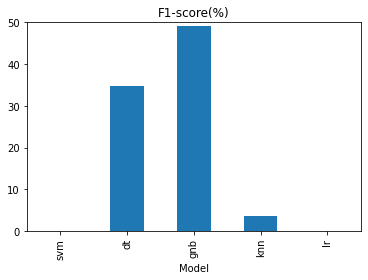

In [50]:
# TODO
# 计算以上五个模型的F1值，保存在dataframe类型的变量results_df中并绘制成柱形图
results_df = pd.DataFrame(columns=['f1'],index=['svm','dt','gnb','knn','lr'])
results_df.index.name = 'Model'

from sklearn.metrics import f1_score

models = {
    'svm':svm_model,
    'dt': dt_model,
    'gnb': gnb_model,
    'knn': knn_model,
    'lr': lr_model
}


for model_name, model in models.items():
    y_pred = model.predict(X_test)
    fsc = f1_score(y_test, y_pred, average='binary', pos_label=1)
    print(model_name,fsc)
    results_df.loc[model_name, 'F1-score (%)'] = fsc * 100

plt.figure(figsize=(10, 4))
ax1 = plt.subplot(1, 2, 1)
results_df.plot(y=['F1-score (%)'], kind='bar', ylim=[0, 50], ax=ax1, title='F1-score(%)', legend=False)
plt.tight_layout()
plt.show()

### 问题

在这些模型中，你看到的SVM的F1值是多少？ 从F1值的角度评判该模型，所得到的好坏结论与从准确率角度评判所得结论是否相同？

您认为在这里例子中，使用F1值与准确率进行模型评判，哪个指标更为合理？为什么？

** 回答： **
SVM的F1: 0, 不相同
准确率是模型判断正确的概率
F1值是精确率与召回率的调和
离职的预测, 没有精确和召回率上严格的要求. 所以准确率更好